# Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Financial Inclusion Competition on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [ ]:
# Data manipulation and preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Models
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from xgboost import XGBClassifier

# Machine Learning - Model evaluation and selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Machine Learning - Feature selection and pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImPipeline
from imblearn.over_sampling import SMOTE

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')


In [63]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#from google.colab import files
import warnings
warnings.filterwarnings('ignore')

### 1. Load the dataset

In [64]:
# Load files into a pandas dataframe
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
ss = pd.read_csv('data/SampleSubmission.csv')
variables = pd.read_csv('data/VariableDefinitions.csv')

In [65]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


The above output shows the number of rows and columns for train and test dataset. We have 13 variables in the train dataset, 12 independent variables and 1 dependent variable. In the test dataset, we have 12 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [66]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [67]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



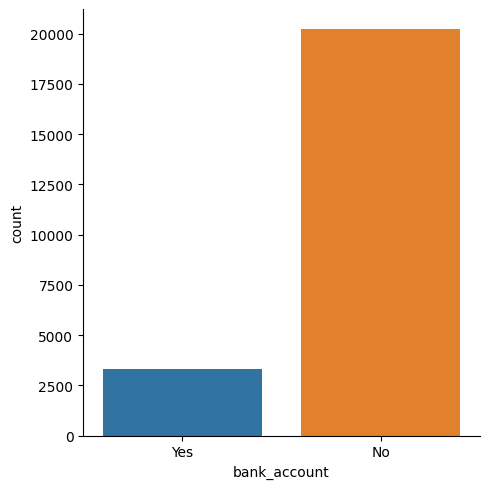

In [68]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=train)
# Data is imbalance and need be balanced

It is important to understand the meaning of each feature so you can really understand the dataset. You can read the VariableDefinition.csv file to understand the meaning of each variable presented in the dataset.

The SampleSubmission.csv gives us an example of how our submission file should look. This file will contain the uniqueid column combined with the country name from the Test.csv file and the target we predict with our model. Once we have created this file, we will submit it to the competition page and obtain a position on the leaderboard.


In [69]:
# view the submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


### 2. Understand the dataset
We can get more information about the features presented by using the info() method from pandas.


In [70]:
 #show some information about the dataset
 print(train.info())

# things to remove from data: uniqueid, year, 

# bank_account 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [71]:
train.groupby(['country', 'year']).size().reset_index(name='count')


,country,year,count
0,Kenya,2018,6068
1,Rwanda,2016,8735
2,Tanzania,2017,6620
3,Uganda,2018,2101


In [72]:
set(train.location_type)

{'Rural', 'Urban'}

In [73]:
train.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

### Encoding step


##### Boolean
##### transform it outsid of preprocessor
location_type                2
cellphone_access             2
gender_of_respondent         2

##### Continuous 
household_size              20
age_of_respondent           85

##### Categorical

##### HotEncoder
country                      4
relationship_with_head       6
marital_status               5
job_type                    10

###### OrdinalEncoder
education_level              6



#### Target
bank_account                 2

In [74]:
train.shape

(23524, 13)

In [75]:
X = train.drop(columns=['uniqueid', 'year', 'bank_account'])

In [76]:
from sklearn.preprocessing import LabelEncoder
y_transformer = LabelEncoder()
y = train['bank_account']

y_transformer = LabelEncoder()
y = y_transformer.fit_transform(y)


In [77]:
print(y)

[1 0 1 ... 0 0 0]


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, random_state=42)

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['household_size', 'age_of_respondent']),
        ('cat', OneHotEncoder(drop='first'), ['country', 'relationship_with_head', 'marital_status', 'job_type', 'location_type', 'cellphone_access', 'gender_of_respondent']),
        ('Ordinal', OrdinalEncoder(), ['education_level'])

    ]
)

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['household_size', 'age_of_respondent']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['country', 'relationship_with_head',
                                  'marital_status', 'job_type', 'location_type',
                                  'cellphone_access', 'gender_of_respondent']),
                                ('Ordinal', OrdinalEncoder(),
                                 ['education_level'])])

In [80]:

transformed_X_train = preprocessor.fit_transform(X_train)

In [81]:
transformed_X_train.shape

(21171, 27)

In [82]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

lr_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),  # Correct placement of comma
    ('lr', LogisticRegressionCV(max_iter=1000))
])

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE


param_grid = {
    'BestK__k': [5, 10, 20, 'all'],  # Adjust these based on your dataset size
    #'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strengths
    'lr__penalty': ['l1', 'l2', 'elasticnet'],  # Including elasticnet and none
    'lr__solver': ['saga'],  # Only saga supports elasticnet
    'lr__l1_ratios': [[0.5]],  # Expecting a list of lists for compatibility with LogisticRegressionCV
}


# GridSearchCV setup
grid_search = RandomizedSearchCV(lr_model, param_grid, cv=5, scoring='precision', verbose=1, n_jobs=-1)

In [84]:
grid_search

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('processor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['household_size',
                                                                                'age_of_respondent']),
                                                                              ('cat',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['country',
                                                                                'relationship_with_head',
                                                                                'marital_status',
                                                                                'job_type',
                                                                                'location_type',
                                                                                'cellphone_access',
                                                                                'gender_of_respondent']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['education_level'])])),
                                             ('BestK', SelectKBest()),
                                             ('imbalance',
                                              SMOTE(random_state=42)),
                                             ('lr',
                                              LogisticRegressionCV(max_iter=1000))]),
                   n_jobs=-1,
                   param_distributions={'BestK__k': [5, 10, 20, 'all'],
                                        'lr__l1_ratios': [[0.5]],
                                        'lr__penalty': ['l1', 'l2',
                                                        'elasticnet'],
                                        'lr__solver': ['saga']},
                   scoring='precision', verbose=1)

In [85]:
Grid_modeling = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [86]:
Grid_modeling.best_params_

{'lr__solver': 'saga',
 'lr__penalty': 'l2',
 'lr__l1_ratios': [0.5],
 'BestK__k': 20}

In [87]:
optimized_model = Grid_modeling.best_estimator_

In [88]:
optimized_model.fit(X_train, y_train)

y_predict = optimized_model.predict(X_test)

In [89]:
y_predict.shape

(2353,)

In [90]:
print(y_predict)

[0 0 1 ... 0 1 1]


In [91]:
metrics_data = []

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc

# Define a global variable to store metrics and ROC data
metrics_data = []

def append_metrics(model_name, accuracy, precision, recall, f1_score, true_labels, scores):
    """
    Append model performance metrics and data for ROC curve plotting to the global variable metrics_data.
    """
    global metrics_data
    metrics_data.append({
        'Model Name': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'True Labels': true_labels,
        'Scores': scores
    })

def plot_metrics():
    """
    Plot the performance metrics stored in metrics_data.
    """
    # Filter out ROC data for metric plotting
    metric_columns = ['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
    df = pd.DataFrame(metrics_data, columns=metric_columns)
    
    # Set the model name as the index
    df.set_index('Model Name', inplace=True)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    for column in df.columns:
        plt.plot(df.index, df[column], marker='o', label=column)
    
    plt.title('Model Performance Metrics')
    plt.xlabel('Model Name')
    plt.ylabel('Score')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Assume metrics_data is already defined and populated with the necessary data

def plot_all_roc_curves():
    """
    Plot the ROC curves for all models stored in metrics_data.
    """
    plt.figure(figsize=(10, 10))

    for data in metrics_data:
        true_labels = data['True Labels']
        scores = data['Scores']
        model_name = data['Model Name']
        
        fpr, tpr, _ = roc_curve(true_labels, scores)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Accuracy = accuracy_score(y_test, y_predict)
print(Accuracy)
Precision = precision_score(y_test, y_predict)
print(Precision)
Recall = recall_score(y_test, y_predict)
print(Recall)
f1 = f1_score(y_test, y_predict)
print(f1)

print(confusion_matrix(y_test, y_predict))






0.7751806204844879
0.3601694915254237
0.770392749244713
0.490856592877767
[[1569  453]
 [  76  255]]


Accuracy: 0.7752
Precision: 0.3602
Recall: 0.7704
F1-Score: 0.4909


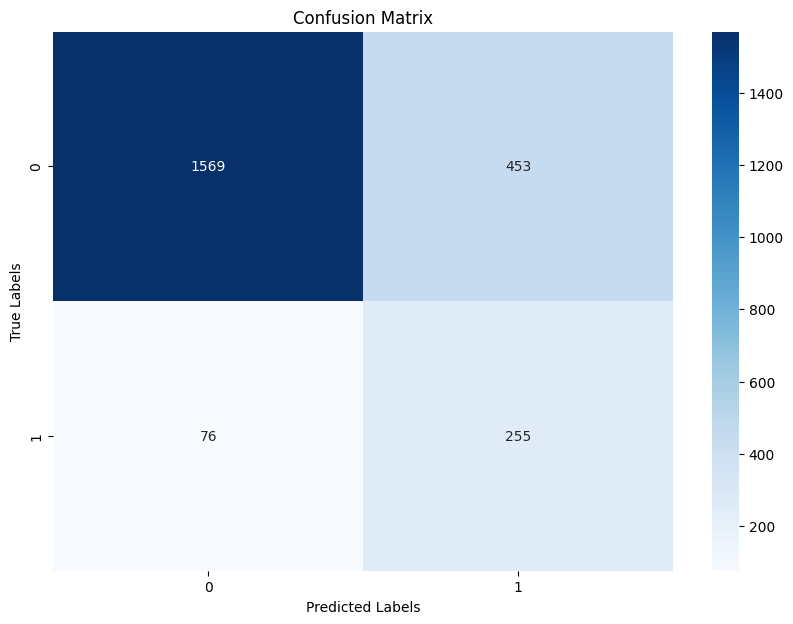

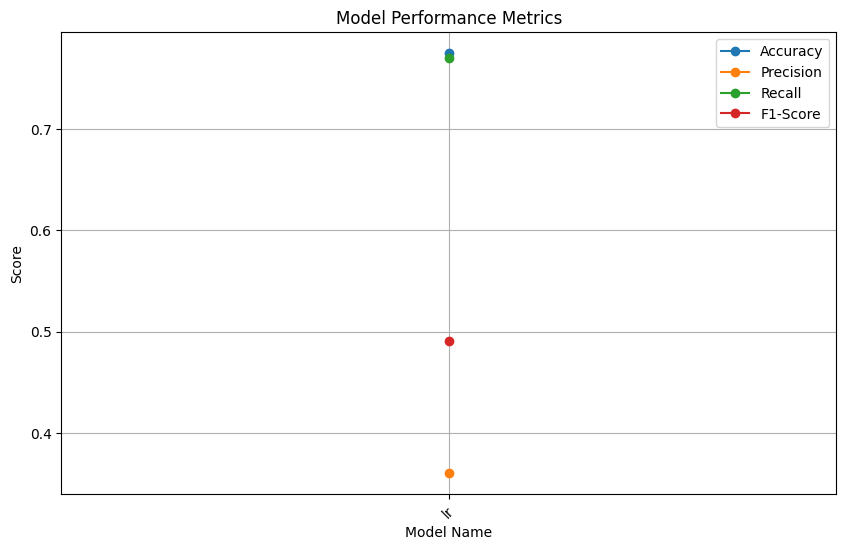

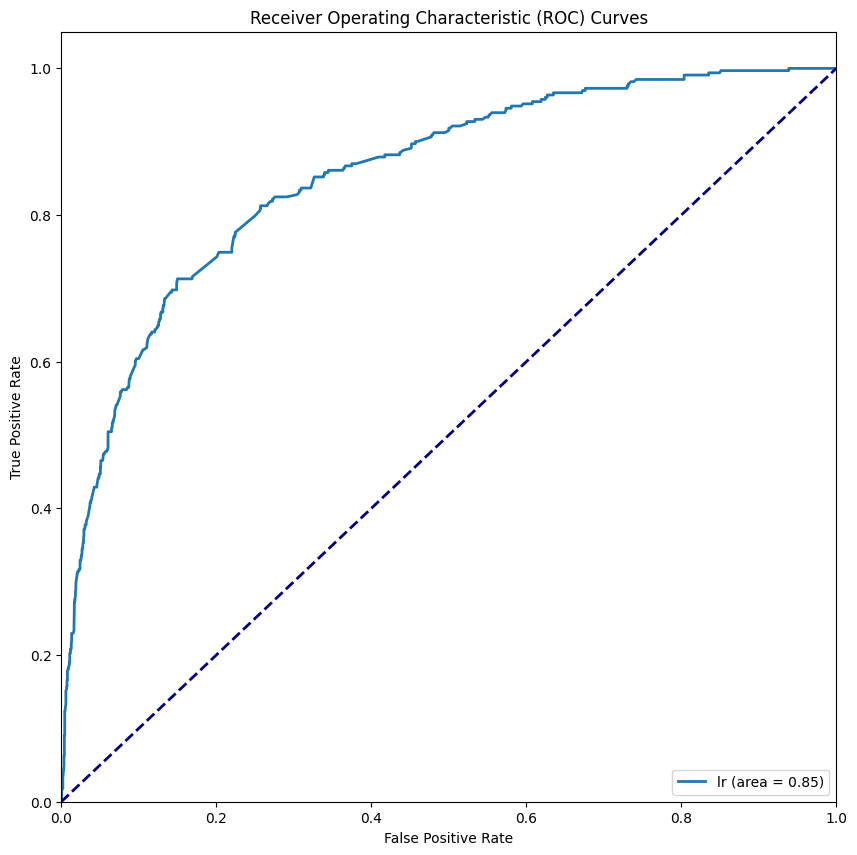

In [94]:
y_pred = optimized_model.predict(X_test)

# Predict probabilities for the positive class (1)
scores = optimized_model.predict_proba(X_test)[:, 1]


# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Example of how to call these functions
append_metrics('lr', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()

Accuracy: 0.8738
Precision: 0.5934
Recall: 0.3263
F1-Score: 0.4211


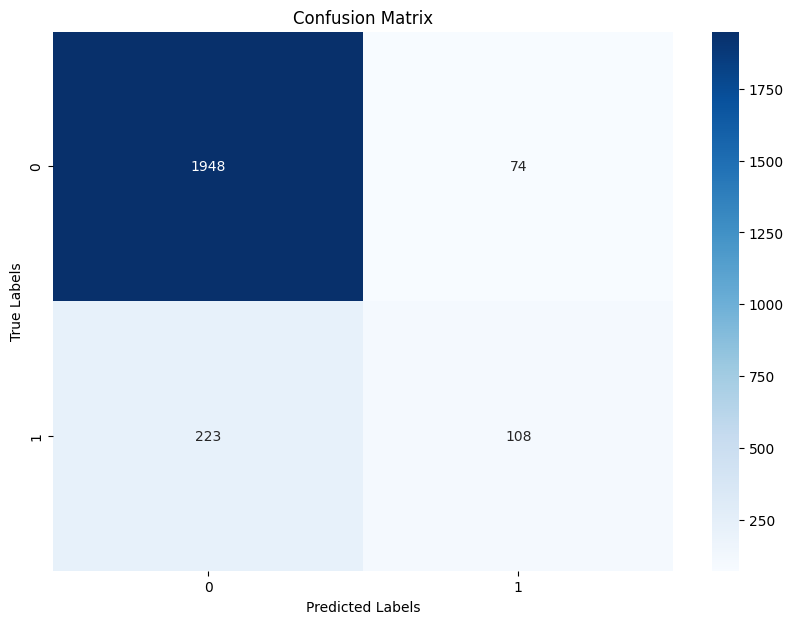

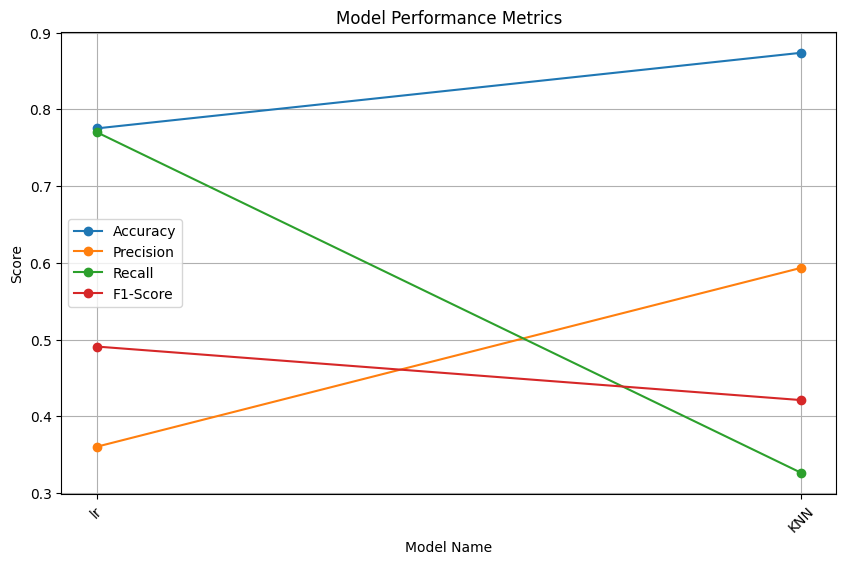

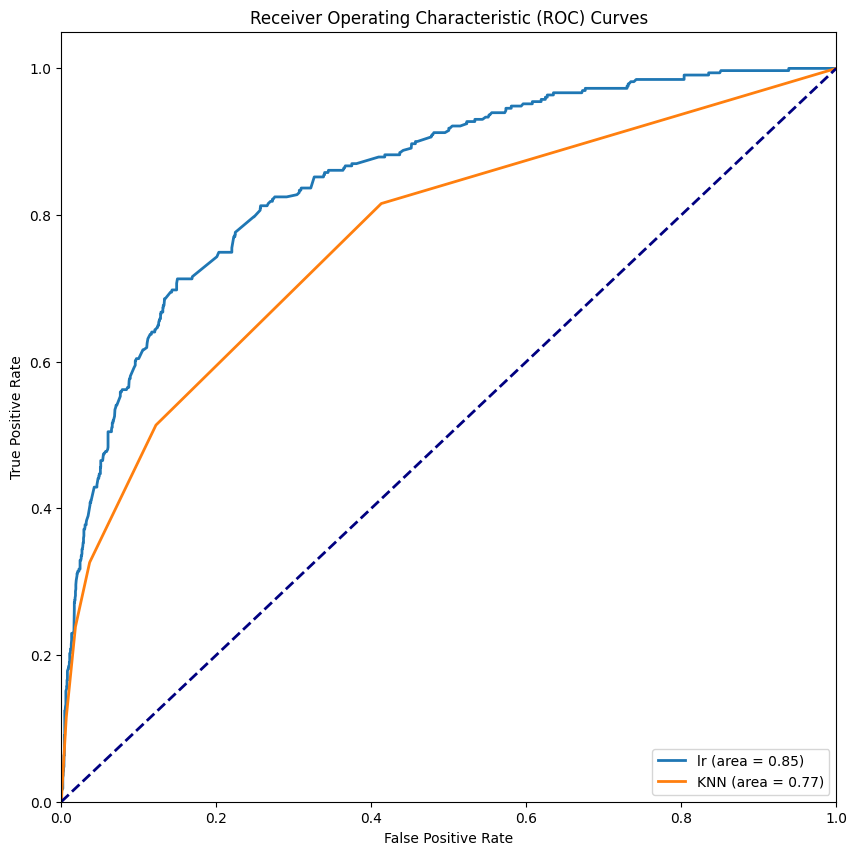

In [95]:
## KNN
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#



KNN_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),  # Correct placement of comma
    ('KNN', KNeighborsClassifier(n_neighbors=5))
])

KNN_model_fit = KNN_model.fit(X_train, y_train)

y_pred = KNN_model_fit.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for the positive class (1)
scores = KNN_model_fit.predict_proba(X_test)[:, 1]

# Example of how to call these functions
append_metrics('KNN', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()


Accuracy: 0.8317
Precision: 0.4313
Recall: 0.6163
F1-Score: 0.5075


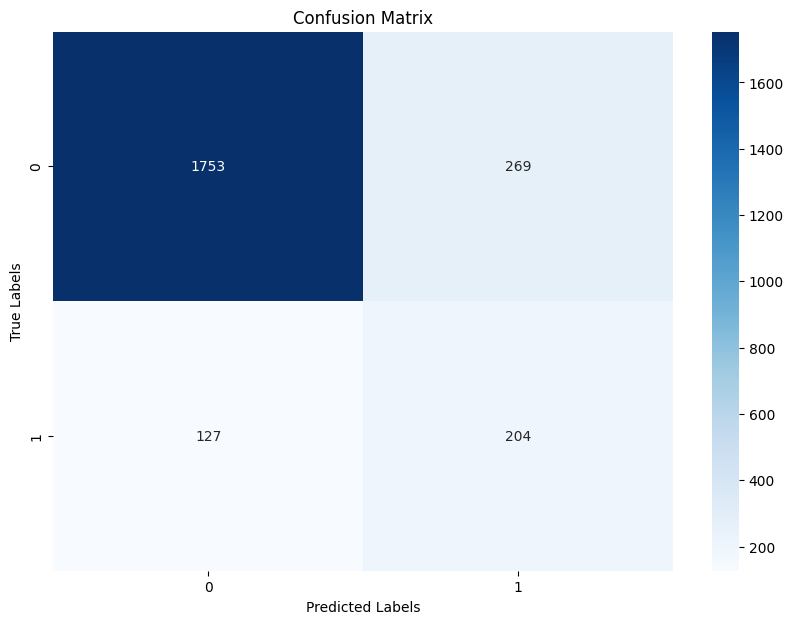

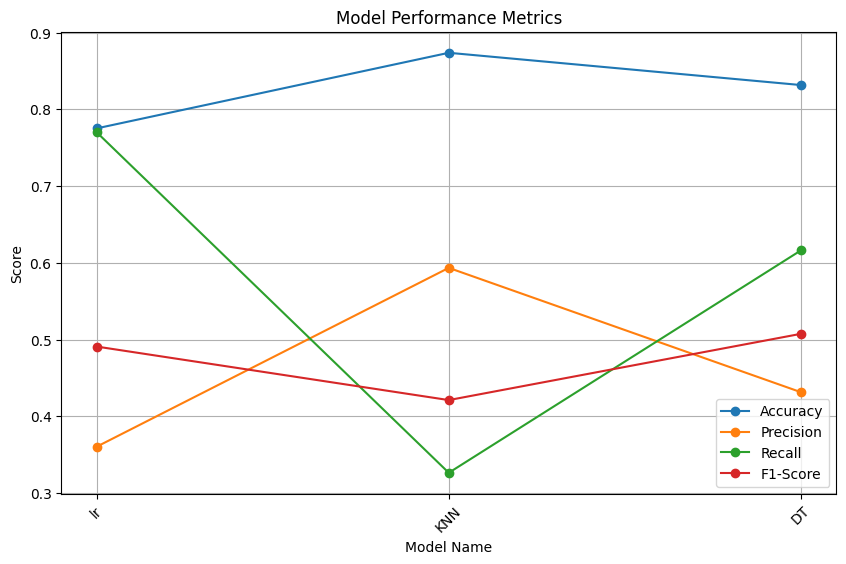

In [96]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'preprocessor' and other necessary imports and preprocessing are defined elsewhere

DT_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),
    ('DT', DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2, random_state=42))
    ])

DT_model_fit = DT_model.fit(X_train, y_train)

y_pred = DT_model_fit.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # assuming 'Yes' is the positive class
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for the positive class (1), if needed
# Note: DecisionTreeClassifier does not output probabilities in the same manner as GradientBoostingClassifier
# If you need probability estimates, consider using the predict_proba method, but with careful interpretation

# Adjust the append_metrics, plot_metrics, and plot_all_roc_curves functions as necessary
append_metrics('DT', accuracy, precision, recall, f1, y_test, y_pred)  # Adjust according to your implementation
plot_metrics()
# plot_all_roc_curves()


Accuracy: 0.7641
Precision: 0.3427
Recall: 0.7372
F1-Score: 0.4679


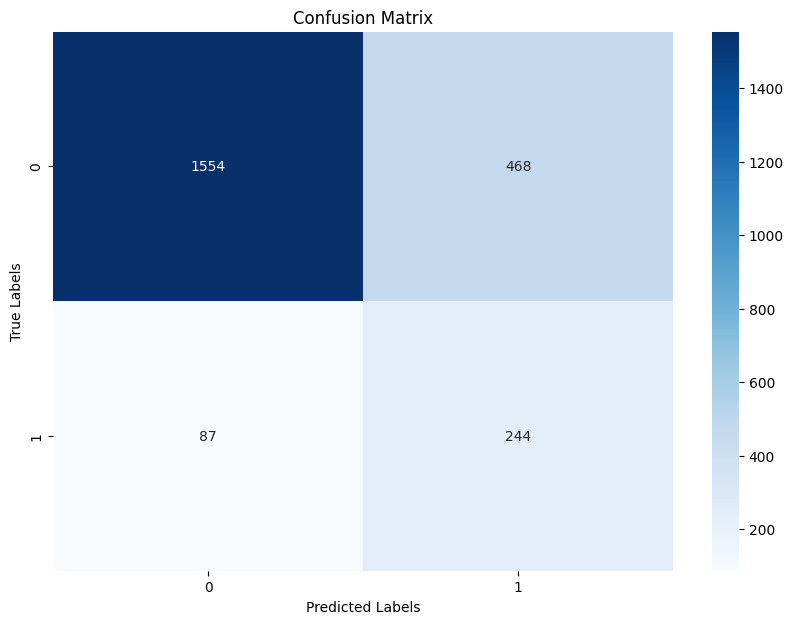

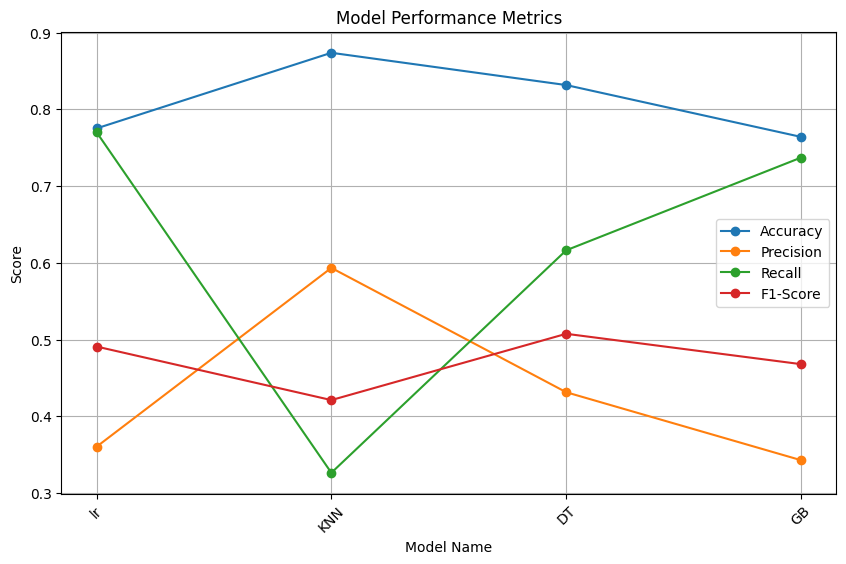

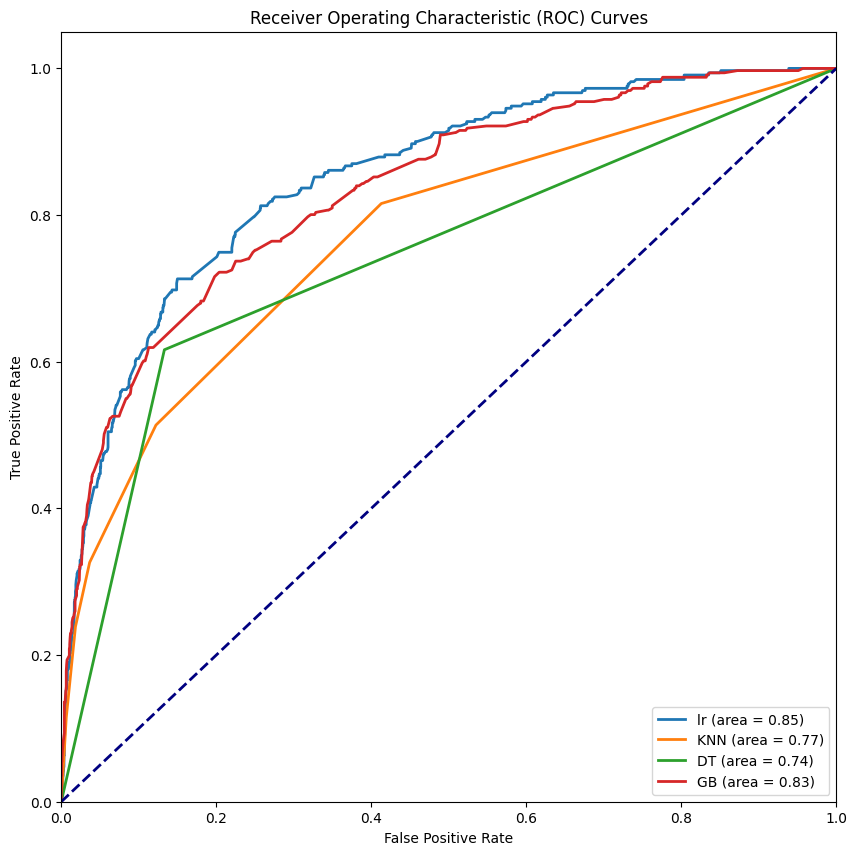

In [97]:
## Gradient boost

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

GB_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),  # Correct placement of comma
    ('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42))
    ])

GB_model_fit = GB_model.fit(X_train, y_train)

y_pred = GB_model_fit.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
scores = GB_model_fit.predict_proba(X_test)[:, 1]
# Example of how to call these functions
append_metrics('GB', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()


Accuracy: 0.7616
Precision: 0.3438
Recall: 0.7644
F1-Score: 0.4742


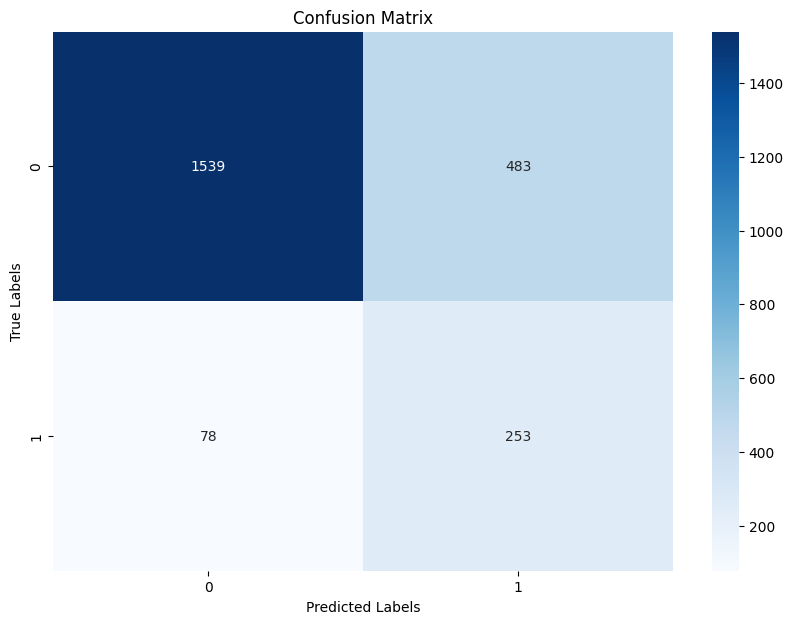

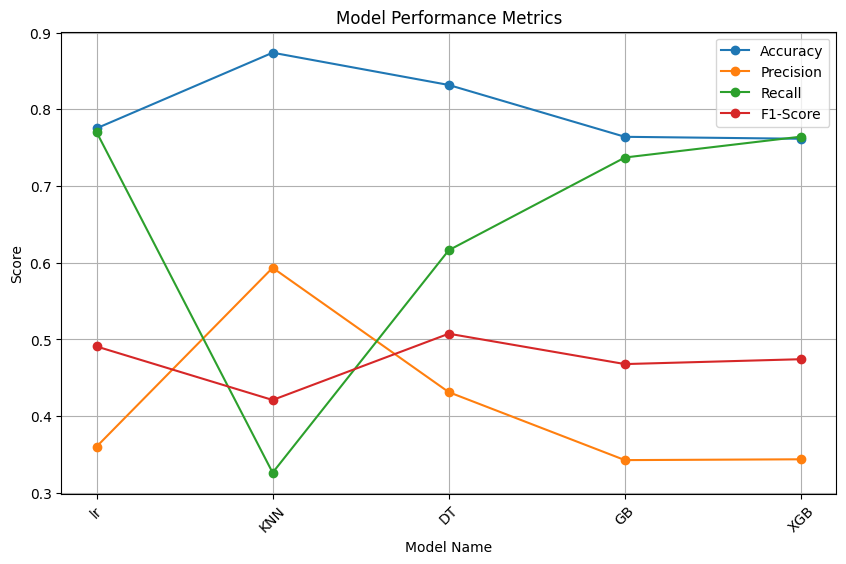

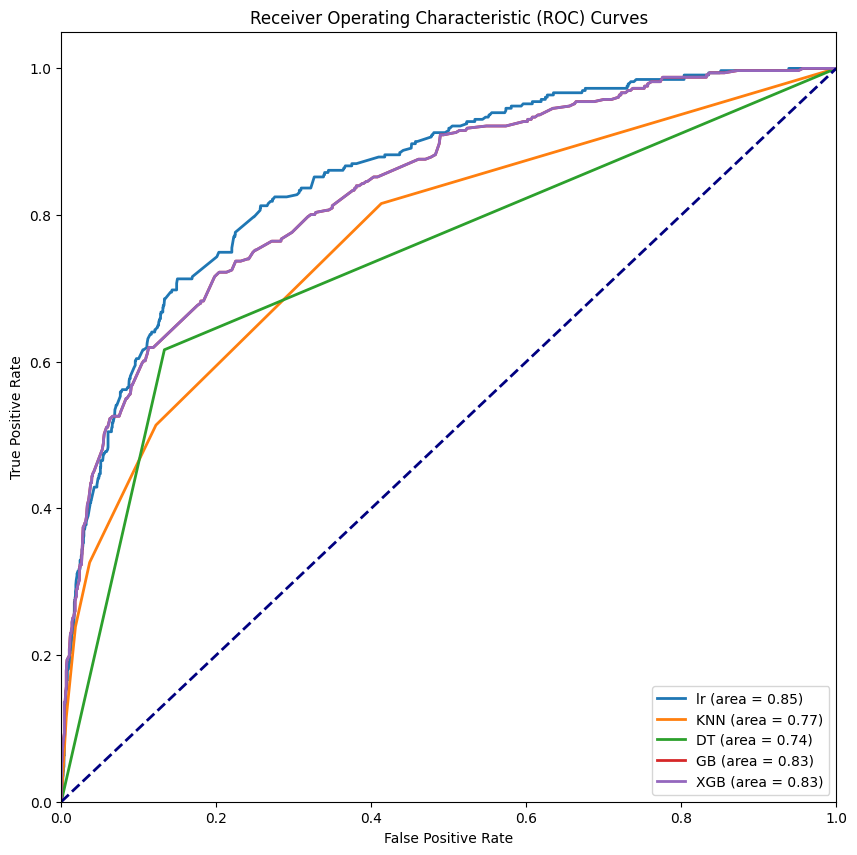

In [98]:
# XGboost
from xgboost import XGBClassifier
## Gradient boost

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

XGB_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),
    ('XGB', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8, colsample_bytree=0.8, use_label_encoder=False, eval_metric='logloss', random_state=42))
    ])

XGB_model_fit = XGB_model.fit(X_train, y_train)
y_pred = XGB_model_fit.predict(X_test)

# Calculate and print metrics (assuming you've already defined or imported accuracy_score, precision_score, etc.)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
scores = GB_model_fit.predict_proba(X_test)[:, 1]
# Example of how to call these functions
append_metrics('XGB', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()




Accuracy: 0.7641
Precision: 0.3427
Recall: 0.7372
F1-Score: 0.4679


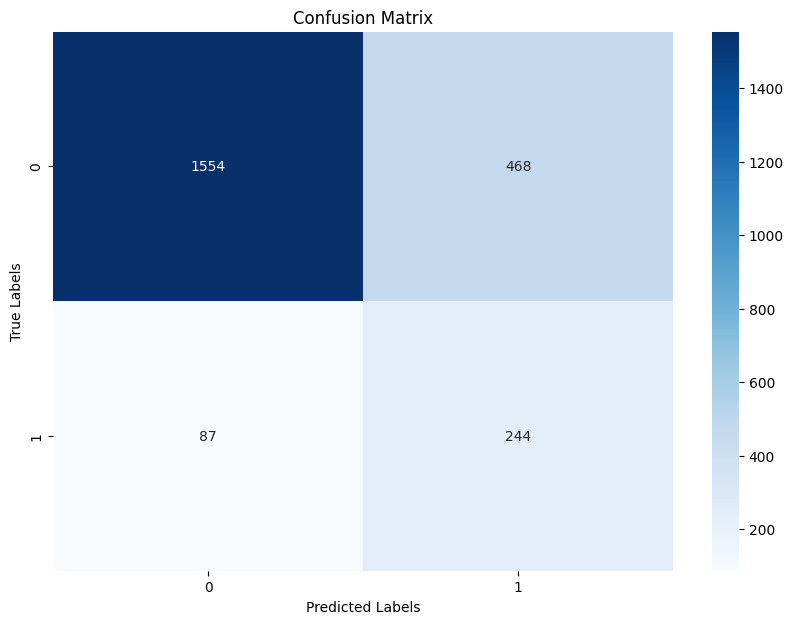

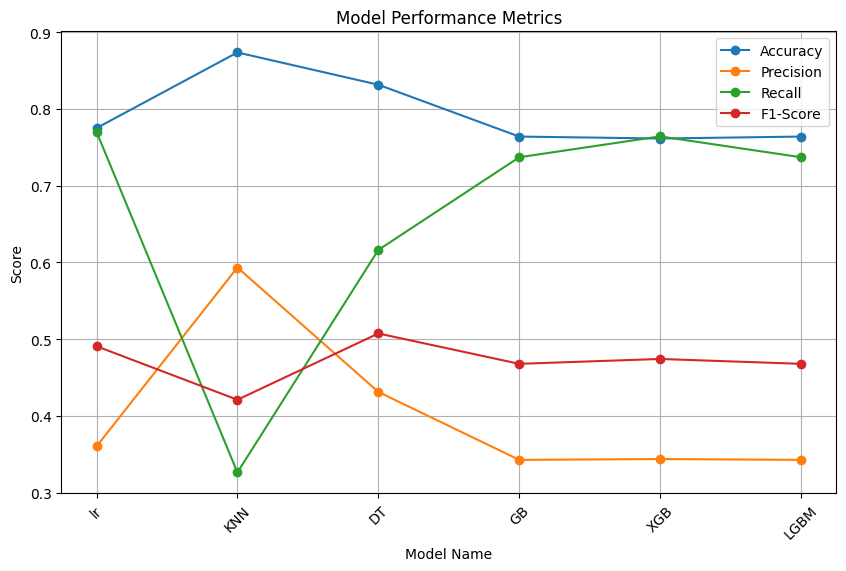

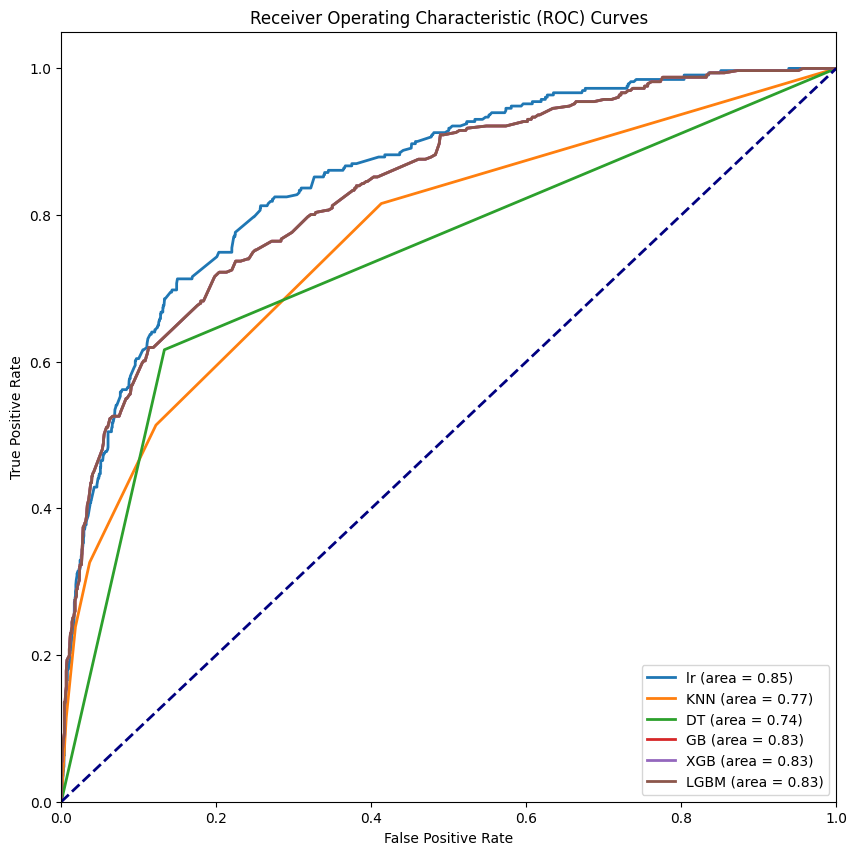

In [99]:
# lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

LGBM_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),  # Correct placement of comma
    ('LGBM', LGBMClassifier(num_leaves=31, learning_rate=0.1, n_estimators=100))
    ])

LGBM_model_fit = GB_model.fit(X_train, y_train)

y_pred = LGBM_model_fit.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
scores = LGBM_model_fit.predict_proba(X_test)[:, 1]

# Example of how to call these functions
append_metrics('LGBM', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()


Accuracy: 0.7641
Precision: 0.3427
Recall: 0.7372
F1-Score: 0.4679


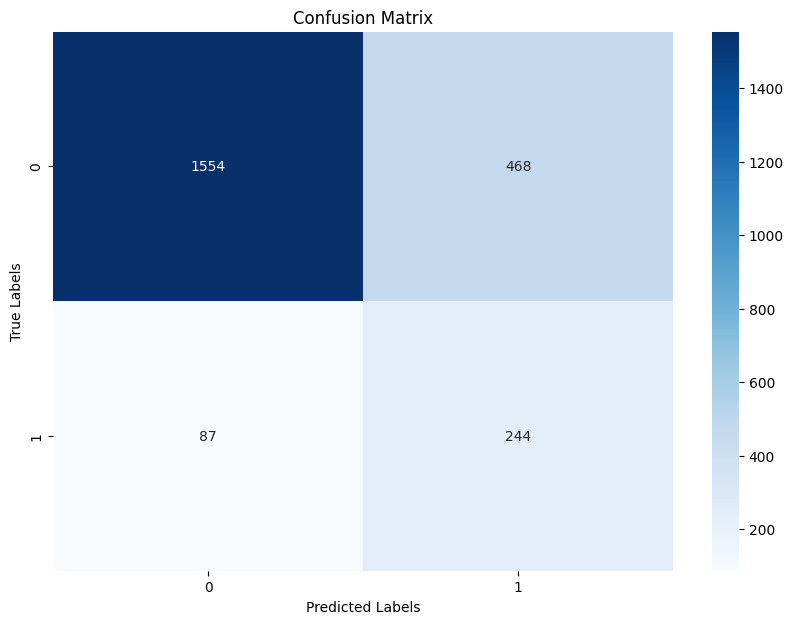

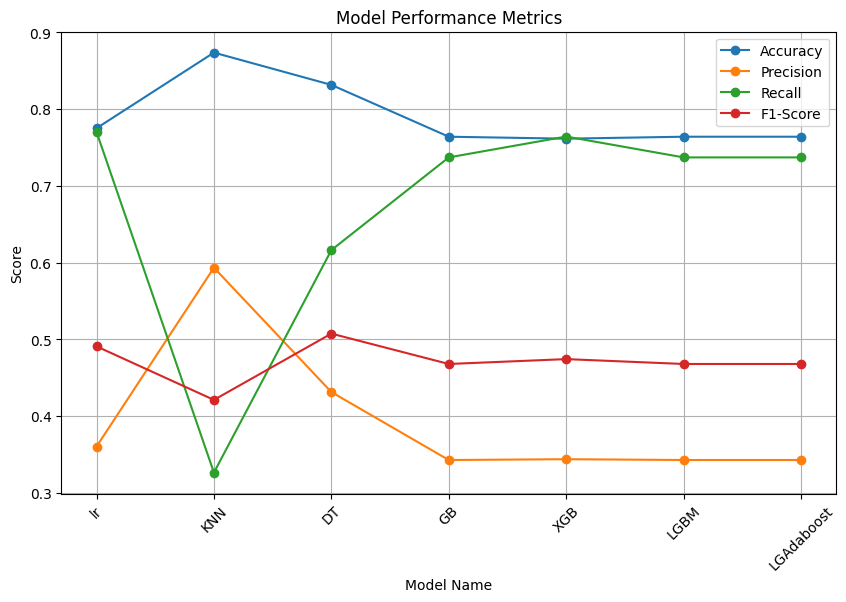

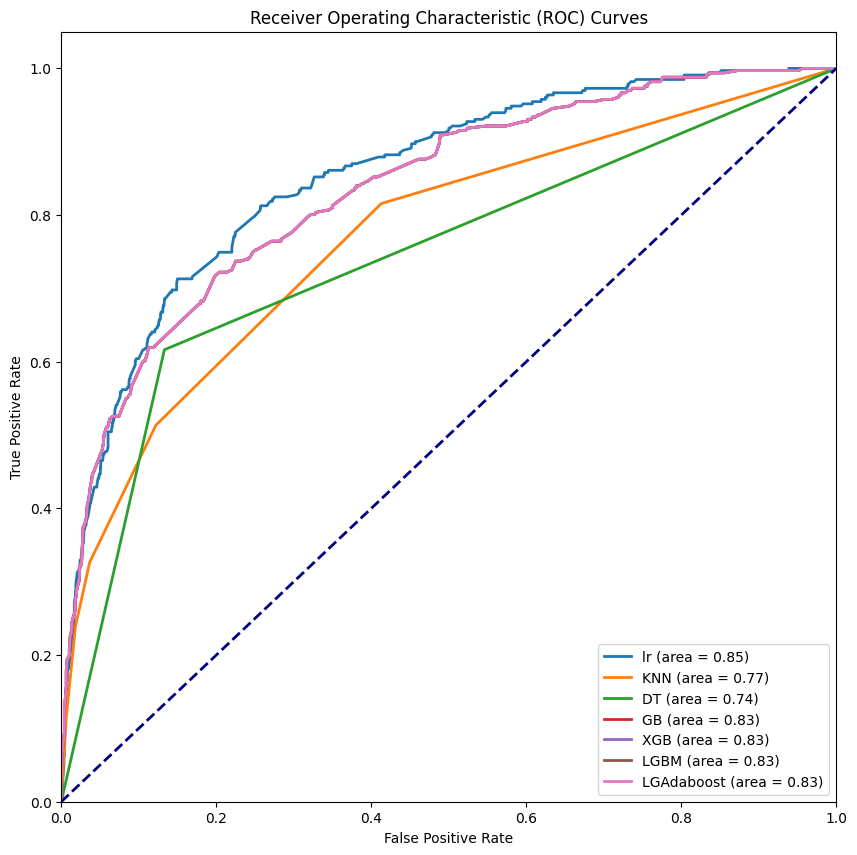

In [100]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

Adaboost_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),  # Correct placement of comma
    ('Adaboost', AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42))
    ])

Adaboost_model_fit = GB_model.fit(X_train, y_train)

y_pred = Adaboost_model_fit.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
scores = Adaboost_model_fit.predict_proba(X_test)[:, 1]

# Example of how to call these functions
append_metrics('LGAdaboost', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()


Accuracy: 0.7641
Precision: 0.3427
Recall: 0.7372
F1-Score: 0.4679


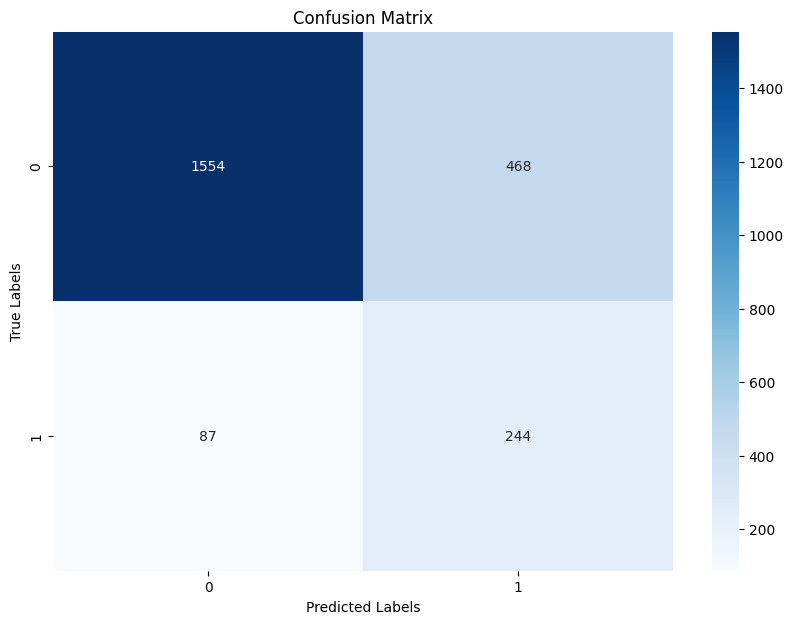

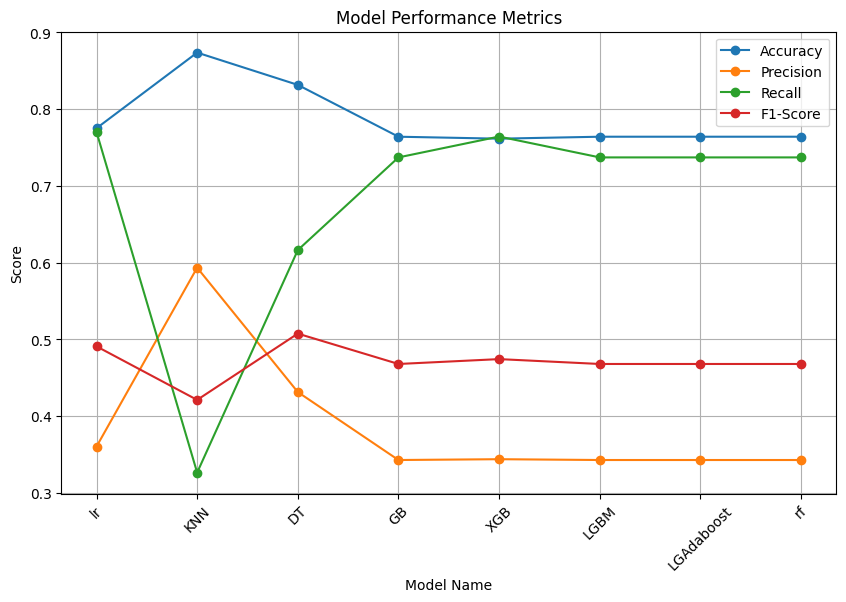

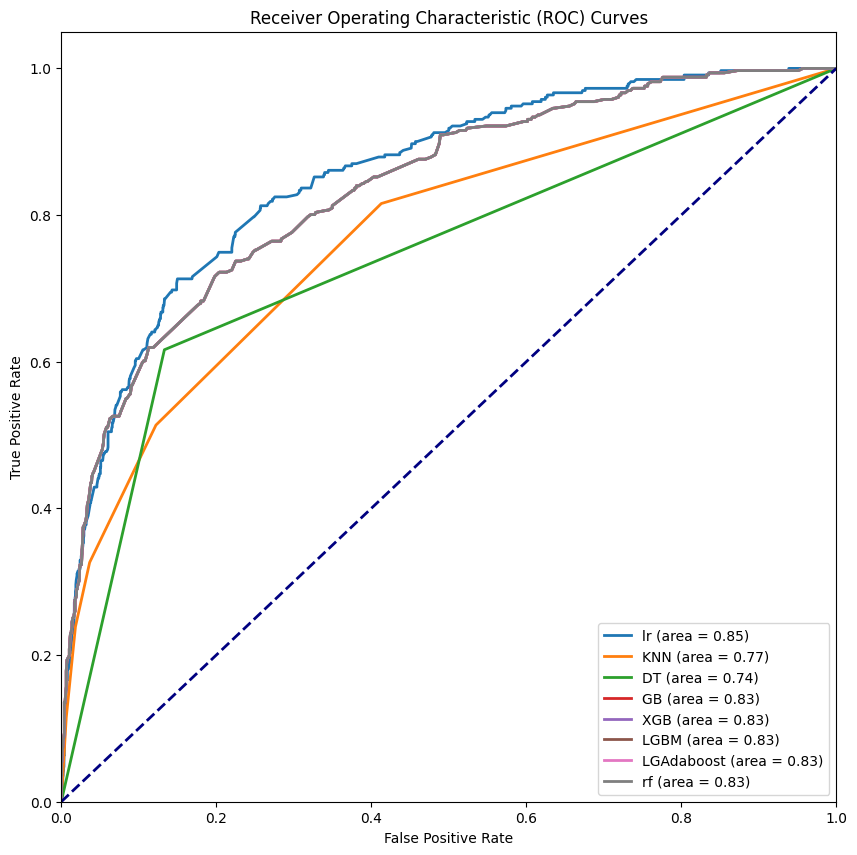

In [101]:
## randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

rf_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),  # Correct placement of comma
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ])

rf_model_fit = GB_model.fit(X_train, y_train)
y_pred = rf_model_fit.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
scores = rf_model_fit.predict_proba(X_test)[:, 1]

# Example of how to call these functions
append_metrics('rf', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()

## Hard voting



[LightGBM] [Info] Number of positive: 18190, number of negative: 18190
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 36380, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


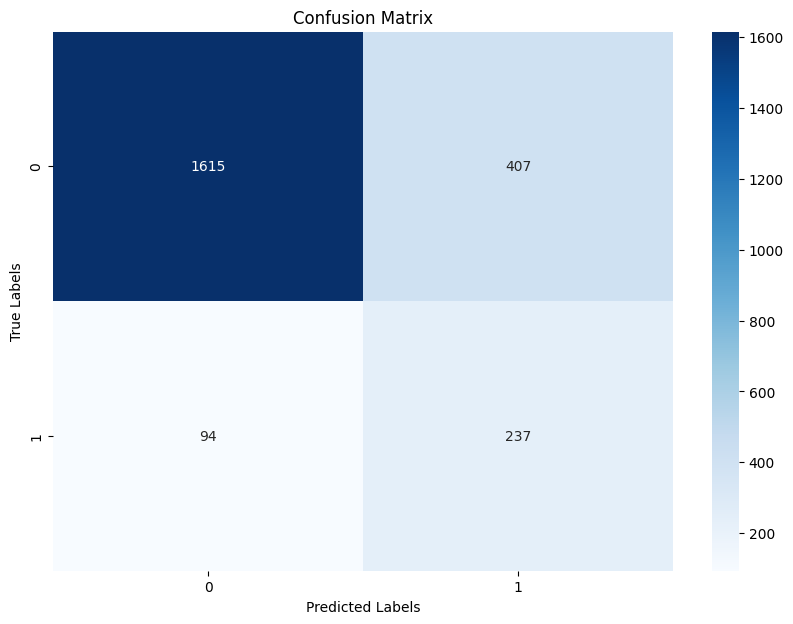

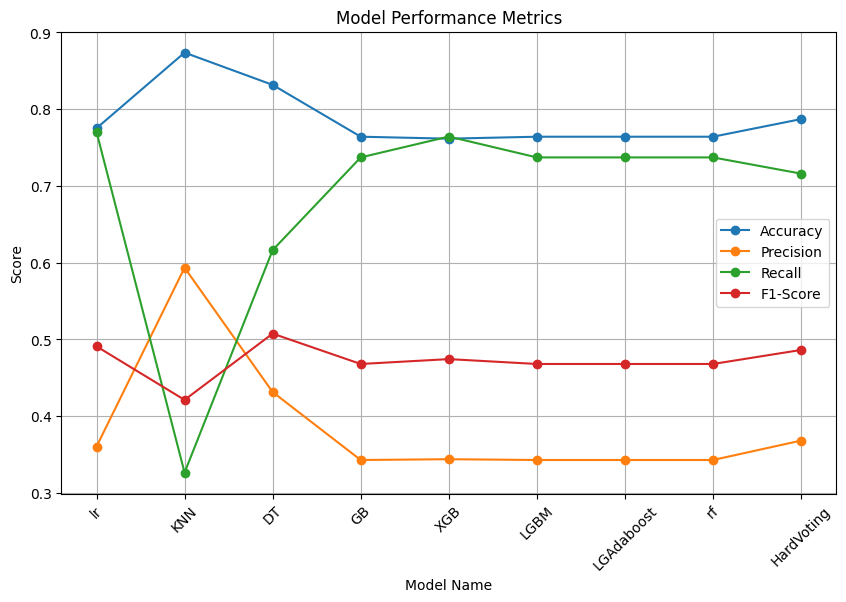

In [102]:
from sklearn.ensemble import VotingClassifier

HardVoting = VotingClassifier(
    estimators=[('KNN', KNN_model), ('GB', GB_model), ('LGBM', LGBM_model),
                ('Ada', Adaboost_model), ('rf', rf_model)],
    voting='hard')

HardVoting.fit(X_train, y_train)
y_pred = HardVoting.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
#scores = HardVoting.predict_proba(X_test)[:, 1]

# Example of how to call these functions
append_metrics('HardVoting', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
#plot_all_roc_curves()


[LightGBM] [Info] Number of positive: 18190, number of negative: 18190
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 36380, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.8296
Precision: 0.4289
Recall: 0.6375
F1-Score: 0.5128


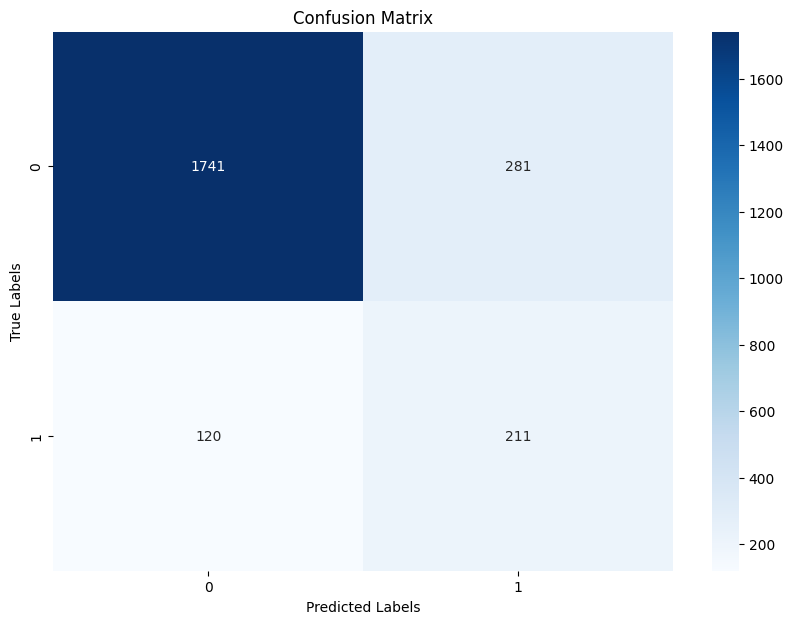

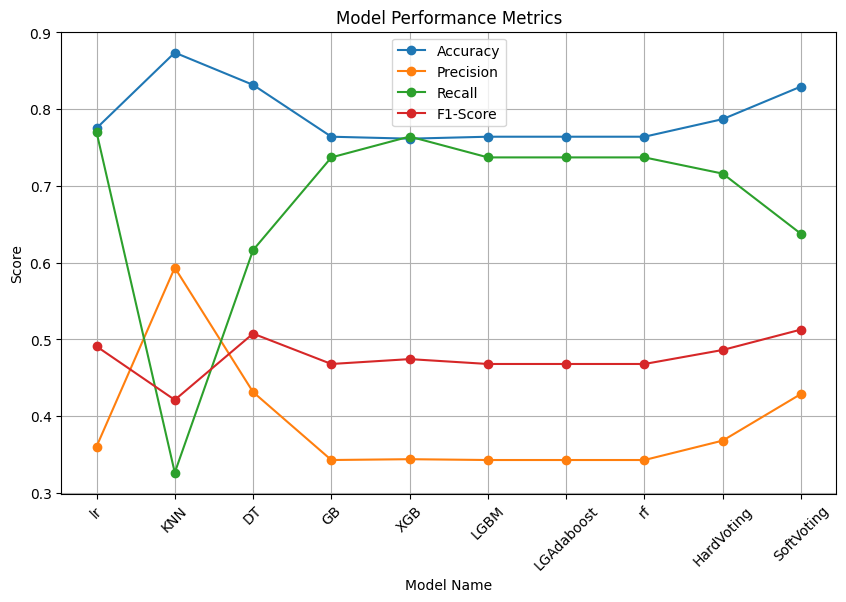

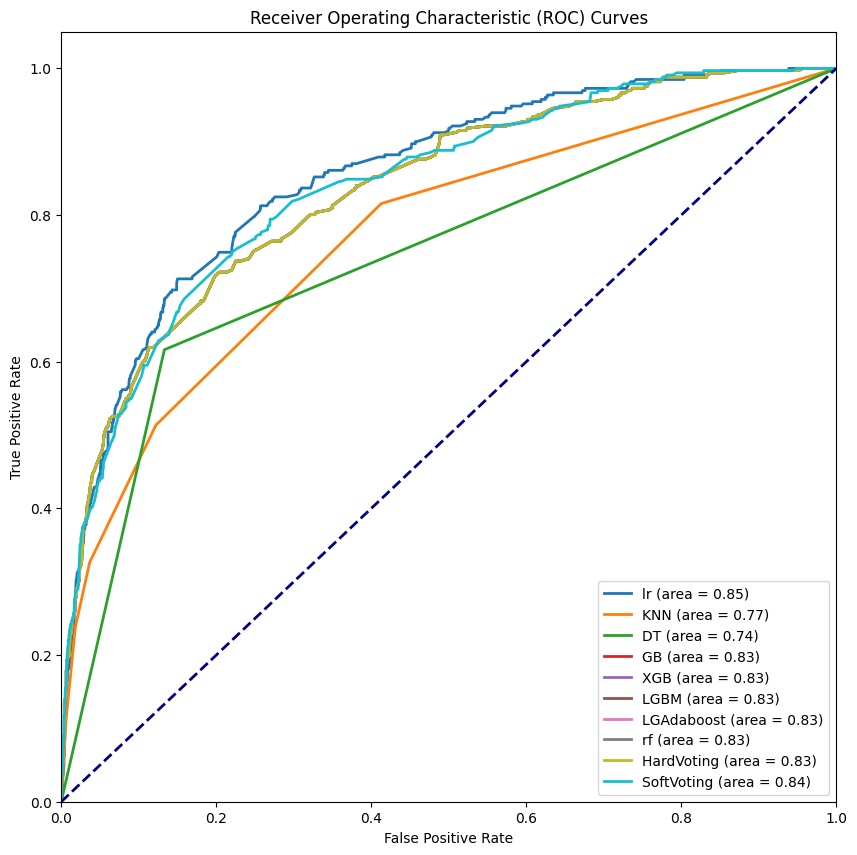

In [103]:
from sklearn.ensemble import VotingClassifier

SoftVoting = VotingClassifier(
    estimators=[('KNN', KNN_model), ('GB', GB_model), ('LGBM', LGBM_model),
                ('Ada', Adaboost_model), ('rf', rf_model)],
    voting='soft')

SoftVoting.fit(X_train, y_train)
y_pred = SoftVoting.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
scores = SoftVoting.predict_proba(X_test)[:, 1]

# Example of how to call these functions
append_metrics('SoftVoting', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()


Accuracy: 0.8908
Precision: 0.7202
Recall: 0.3656
F1-Score: 0.4850


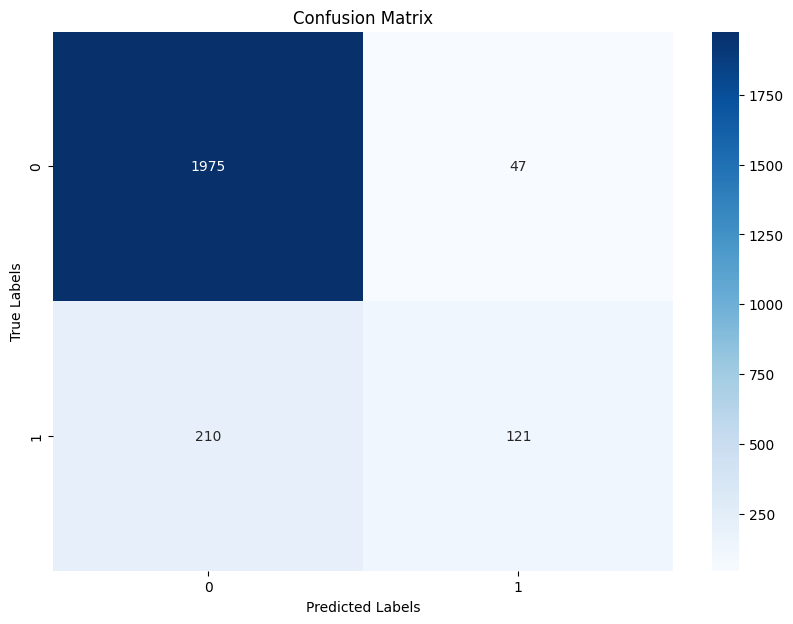

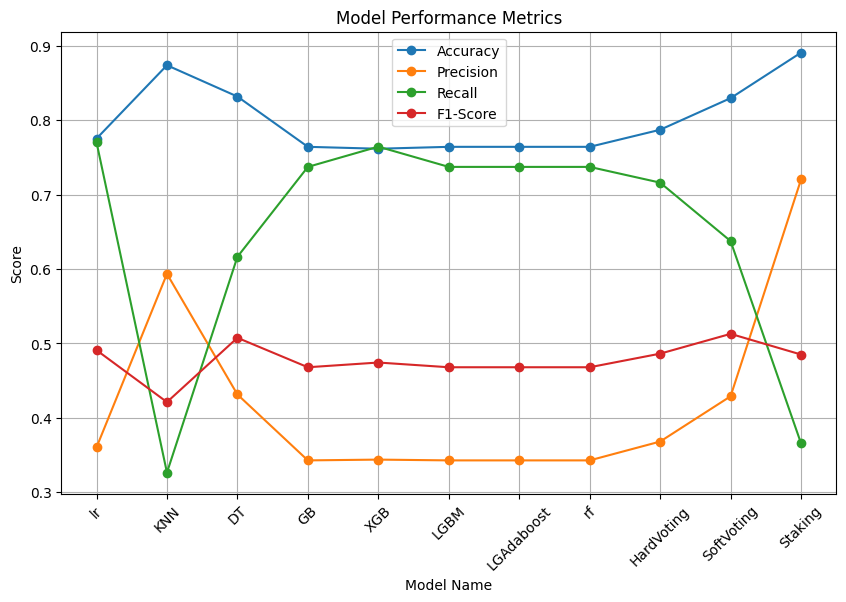

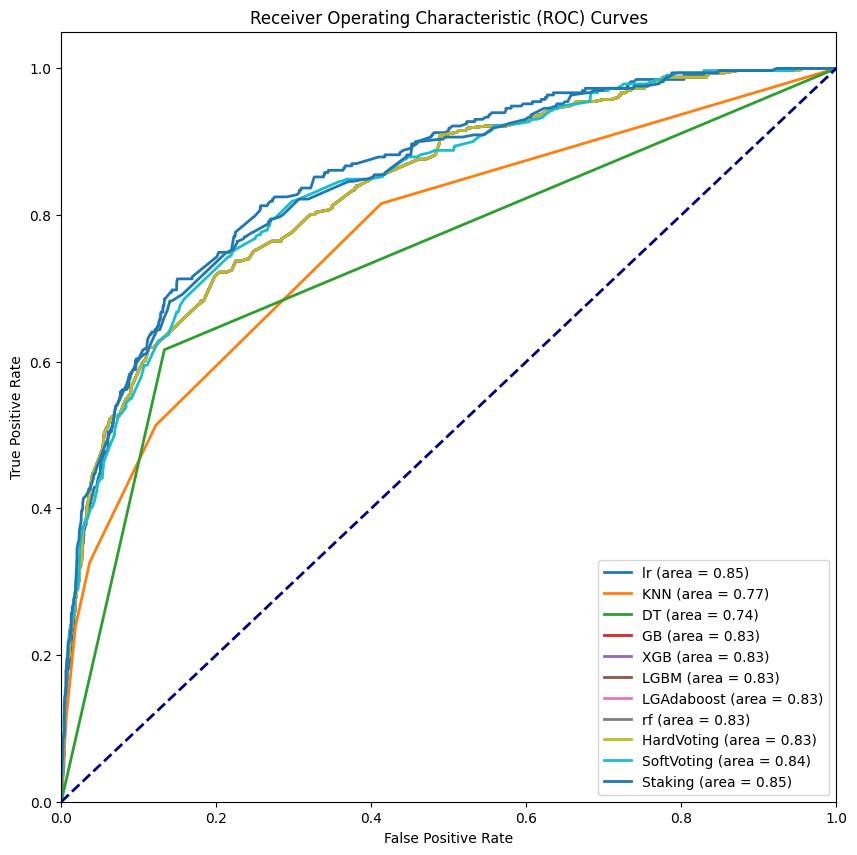

In [104]:
from sklearn.ensemble import StackingClassifier  # Use StackingRegressor for regression tasks
from sklearn.linear_model import LogisticRegressionCV
# Ensure the imports for your base estimators are included
# For example: from sklearn.neighbors import KNeighborsClassifier as KNN
# and so on for GB_model (Gradient Boosting), LGBM_model (LightGBM), Adaboost_model, and rf_model (Random Forest)

# Your base estimators should be initialized before this code block
estimators = [
    ('KNN', KNN_model),
    ('GB', GB_model),
    ('LGBM', LGBM_model),
    ('Ada', Adaboost_model),
    ('rf', rf_model)
]

final_estimator = LogisticRegressionCV(max_iter=1000, cv=5)  # cv parameter is optional but recommended for cross-validation

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,  # Optional: Number of cross-validation folds. Use it if you want to perform CV on the base layer.
    stack_method='auto',  # Optional: Method for the base estimators’ predictions. By default 'auto' chooses 'predict_proba' if available.
    n_jobs=-1  # Optional: Number of CPU cores used when parallelizing over classes. -1 means using all processors.
)

stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)


# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
scores = stacking_classifier.predict_proba(X_test)[:, 1]

# Example of how to call these functions
append_metrics('Staking', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()


In [105]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Assuming preprocessor is already defined and fitted to your data
# Example: preprocessor = ColumnTransformer([...])

# Transform your training data
X_transformed = preprocessor.transform(X_train)

# Fit SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')  # 'all' to keep all features for demonstration
selector.fit(X_transformed, y_train)

# Get scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Extract feature names after transformation
# Check if your preprocessor has a 'get_feature_names_out' method
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = list(preprocessor.get_feature_names_out())
else:
    # Fallback: Generate feature names based on the transformed shape if names are not directly available
    feature_names = ['Feature' + str(i) for i in range(X_transformed.shape[1])]

# Create a DataFrame to display scores and p-values
feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'ANOVA F-Score': scores,
    'p-value': p_values
}).sort_values(by='ANOVA F-Score', ascending=False)

print(feature_scores)


                                            Feature  ANOVA F-Score   
26                         Ordinal__education_level    2476.990501  \
16          cat__job_type_Formally employed Private    1380.958560   
15       cat__job_type_Formally employed Government    1234.741204   
24                        cat__cellphone_access_Yes     987.206912   
25                   cat__gender_of_respondent_Male     291.503718   
5     cat__relationship_with_head_Head of Household     264.026378   
18                cat__job_type_Informally employed     204.840016   
11      cat__marital_status_Married/Living together     174.372550   
3                             cat__country_Tanzania     172.322798   
23                         cat__location_type_Urban     154.506738   
9                cat__relationship_with_head_Spouse      71.576252   
19                          cat__job_type_No Income      68.982590   
2                               cat__country_Rwanda      64.123522   
13                  

                                            Feature  ANOVA F-Score   
26                         Ordinal__education_level    2476.990501  \
16          cat__job_type_Formally employed Private    1380.958560   
15       cat__job_type_Formally employed Government    1234.741204   
24                        cat__cellphone_access_Yes     987.206912   
25                   cat__gender_of_respondent_Male     291.503718   
5     cat__relationship_with_head_Head of Household     264.026378   
18                cat__job_type_Informally employed     204.840016   
11      cat__marital_status_Married/Living together     174.372550   
3                             cat__country_Tanzania     172.322798   
23                         cat__location_type_Urban     154.506738   
9                cat__relationship_with_head_Spouse      71.576252   
19                          cat__job_type_No Income      68.982590   
2                               cat__country_Rwanda      64.123522   
13                  

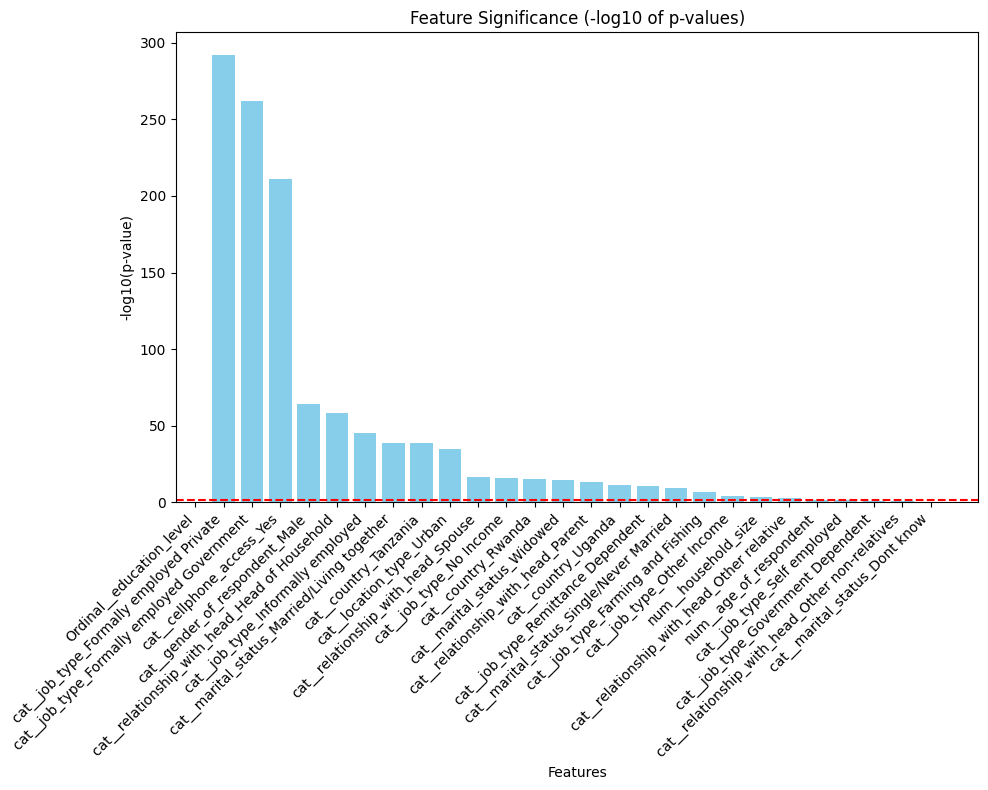

In [139]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['household_size', 'age_of_respondent']),
        ('cat', OneHotEncoder(drop='first', sparse=True), ['country', 'relationship_with_head', 'marital_status', 'job_type', 'location_type', 'cellphone_access', 'gender_of_respondent']),
        ('Ordinal', OrdinalEncoder(), ['education_level'])

    ]
)

# Transform your training data
X_transformed = preprocessor.fit_transform(X_train)

# Fit SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')  # 'all' to keep all features for demonstration
selector.fit(X_transformed, y_train)

# Get scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Extract feature names after transformation
# Check if your preprocessor has a 'get_feature_names_out' method
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = list(preprocessor.get_feature_names_out())
else:
    # Fallback: Generate feature names based on the transformed shape if names are not directly available
    feature_names = ['Feature' + str(i) for i in range(X_transformed.shape[1])]

# Create a DataFrame to display scores and p-values
feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'ANOVA F-Score': scores,
    'p-value': p_values
}).sort_values(by='ANOVA F-Score', ascending=False)

print(feature_scores)

import matplotlib.pyplot as plt
import numpy as np

# Calculate -log10 of p-values
feature_scores['-log10(p-value)'] = -np.log10(feature_scores['p-value'])

# Sort DataFrame by '-log10(p-value)' for better visualization
feature_scores_sorted = feature_scores.sort_values(by='-log10(p-value)', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.bar(feature_scores_sorted['Feature'], feature_scores_sorted['-log10(p-value)'], color='skyblue')

# Add red line for significant threshold (e.g., p-value = 0.05)
plt.axhline(y=-np.log10(0.05), color='red', linestyle='--')

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right")

# Labels and title
plt.xlabel('Features')
plt.ylabel('-log10(p-value)')
plt.title('Feature Significance (-log10 of p-values)')

plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()



In [106]:
# from sklearn.feature_selection import SelectKBest, f_classif
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Assuming preprocessor is already defined and fitted to your data
# # Example: preprocessor = ColumnTransformer([...])

# # Transform your training data
# X_transformed = X_transformed.transform(X_train)

# Encoding = LabelEn
# X_transformed 
# # Fit SelectKBest
# selector = SelectKBest(score_func=f_classif, k='all')  # 'all' to keep all features for demonstration
# selector.fit(X_train, y_train)

# # Get scores and p-values
# scores = selector.scores_
# p_values = selector.pvalues_

# # Extract feature names after transformation
# # Check if your preprocessor has a 'get_feature_names_out' method
# if hasattr(preprocessor, 'get_feature_names_out'):
#     feature_names = list(preprocessor.get_feature_names_out())
# else:
#     # Fallback: Generate feature names based on the transformed shape if names are not directly available
#     feature_names = ['Feature' + str(i) for i in range(X_transformed.shape[1])]

# # Create a DataFrame to display scores and p-values, sorting by 'p-value'
# feature_scores = pd.DataFrame({
#     'Feature': feature_names,
#     'ANOVA F-Score': scores,
#     'p-value': p_values
# }).sort_values(by='p-value', ascending=True)

# # Printing the sorted DataFrame
# print(feature_scores)


In [107]:
print(len(feature_names), len(scores), len(p_values))


27 27 27


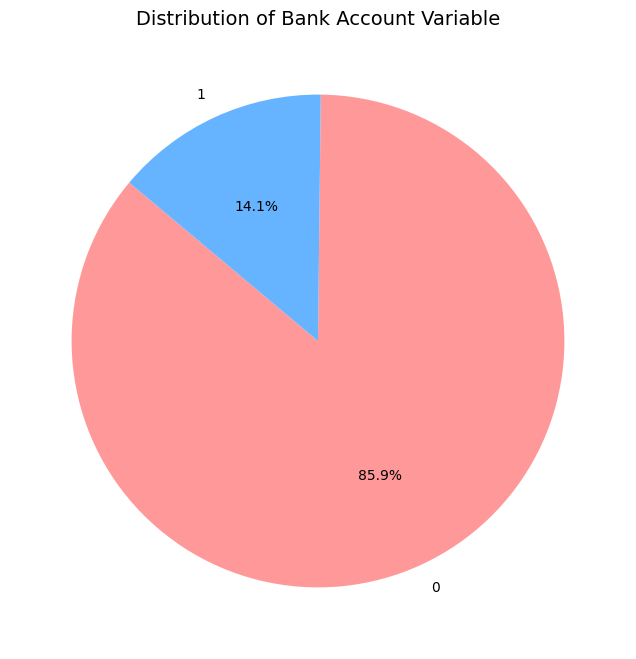

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Custom color palette for the pie chart
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0','#FFB347', 
          '#C4E17F', '#76D7EA', '#FFD1DC', '#D0BBFF', '#FEB2A8', '#FAF0CA', 
          '#B0E0E6', '#FFDAB9', '#E6E6FA', '#FFF0F5', '#D3D3D3']

# Calculate the unique values and their frequency counts in y_test
values, counts = np.unique(y_test, return_counts=True)
# Normalize the counts to get proportions
proportions = counts / counts.sum()

# Generate a pie plot with the custom colors
plt.figure(figsize=(10, 8))  # Adjust the figure size to your preference
plt.pie(proportions, labels=values, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Bank Account Variable', fontsize=14)  # You can adjust the title and fontsize
plt.show()


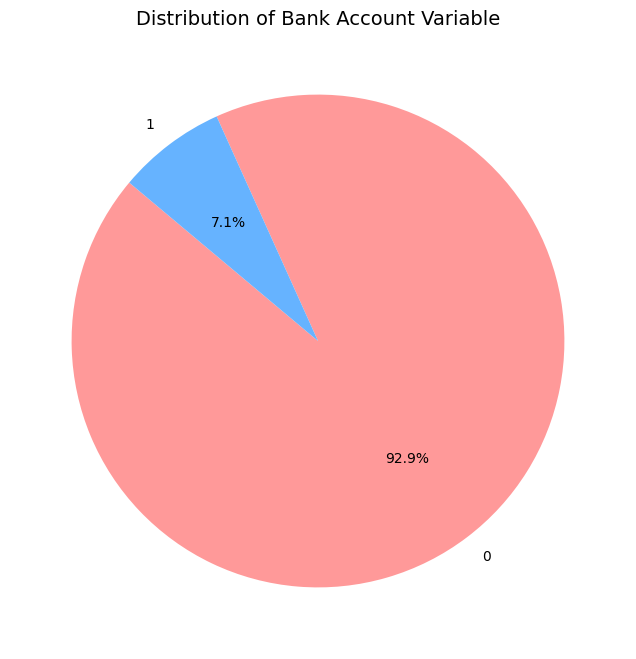

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# Custom color palette for the pie chart
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0','#FFB347', 
          '#C4E17F', '#76D7EA', '#FFD1DC', '#D0BBFF', '#FEB2A8', '#FAF0CA', 
          '#B0E0E6', '#FFDAB9', '#E6E6FA', '#FFF0F5', '#D3D3D3']

# Calculate the unique values and their frequency counts in y_test
values, counts = np.unique(y_pred, return_counts=True)
# Normalize the counts to get proportions
proportions = counts / counts.sum()

# Generate a pie plot with the custom colors
plt.figure(figsize=(10, 8))  # Adjust the figure size to your preference
plt.pie(proportions, labels=values, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Bank Account Variable', fontsize=14)  # You can adjust the title and fontsize
plt.show()

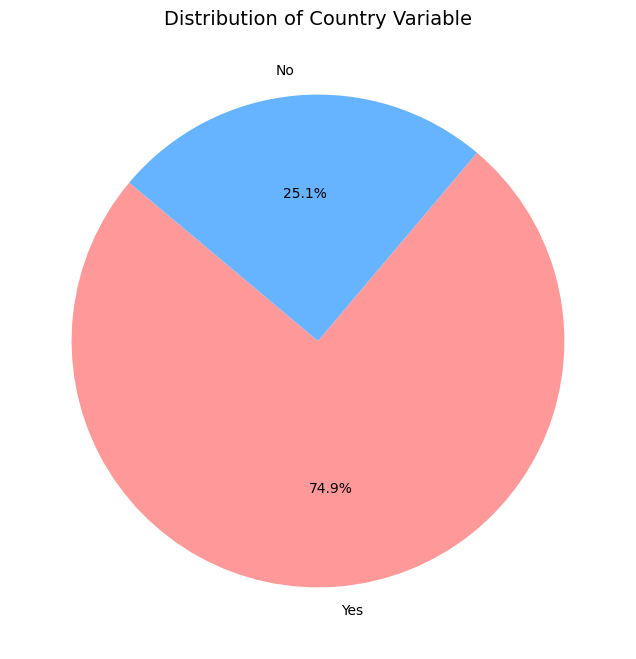

In [110]:
import matplotlib.pyplot as plt

# Custom color palette for the pie chart
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0','#FFB347', '#C4E17F', '#76D7EA', '#FFD1DC', '#D0BBFF', '#FEB2A8', '#FAF0CA', '#B0E0E6', '#FFDAB9', '#E6E6FA', '#FFF0F5', '#D3D3D3']

# Calculate the distribution of the 'bank_account' variable as before
distribution = test['cellphone_access'].value_counts(normalize=True)

# Generate a pie plot with the custom colors
plt.figure(figsize=(10, 8))  # Adjust the figure size to your preference
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Cellphone Access Variable', fontsize=14)  # You can adjust the title and fontsize
plt.show()


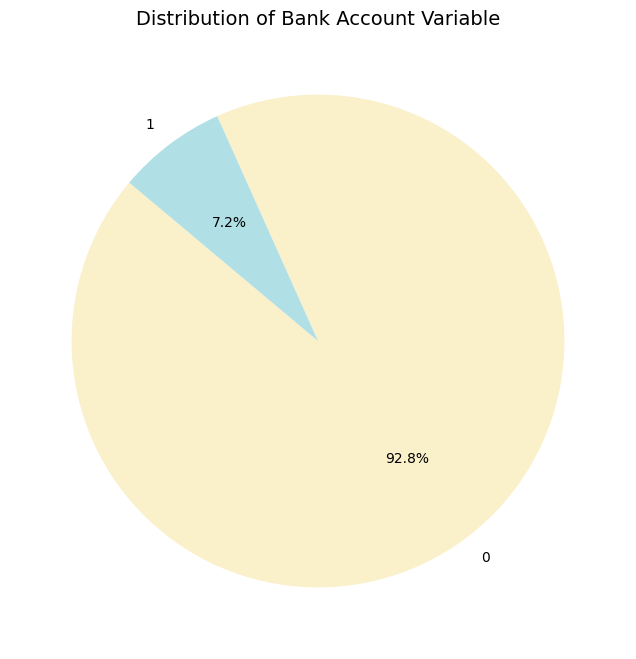

In [126]:
# 
X_test['cellphone_access'] = X_test['cellphone_access'].replace('No', 'Yes')
y_pred = stacking_classifier.predict(X_test)

import matplotlib.pyplot as plt
import numpy as np

# Custom color palette for the pie chart
colors = [ '#FAF0CA', 
          '#B0E0E6', '#FFDAB9', '#E6E6FA', '#FFF0F5', '#D3D3D3']

# Calculate the unique values and their frequency counts in y_test
values, counts = np.unique(y_pred, return_counts=True)
# Normalize the counts to get proportions
proportions = counts / counts.sum()

# Generate a pie plot with the custom colors
plt.figure(figsize=(10, 8))  # Adjust the figure size to your preference
plt.pie(proportions, labels=values, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Bank Account Variable', fontsize=14)  # You can adjust the title and fontsize
plt.show()

In [112]:
X_test.columns

Index(['country', 'location_type', 'cellphone_access', 'household_size',
       'age_of_respondent', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [132]:
# 
X_test_prediction = X_test.copy()

# Step 1: Replace current levels with temporary placeholders
X_test_prediction['education_level'] = X_test_prediction['education_level'].replace('Tertiary education', 'Temp Level for Tertiary')
X_test_prediction['education_level'] = X_test_prediction['education_level'].replace('Secondary education', 'Temp Level for Secondary')
X_test_prediction['education_level'] = X_test_prediction['education_level'].replace('Primary education', 'Temp Level for Primary')
X_test_prediction['education_level'] = X_test_prediction['education_level'].replace('No formal education', 'Primary education')

# Step 2: Replace temporary placeholders with the final desired levels
X_test_prediction['education_level'] = X_test_prediction['education_level'].replace('Temp Level for Tertiary', 'Vocational/Specialised training')
X_test_prediction['education_level'] = X_test_prediction['education_level'].replace('Temp Level for Secondary', 'Tertiary education')
X_test_prediction['education_level'] = X_test_prediction['education_level'].replace('Temp Level for Primary', 'Secondary education')


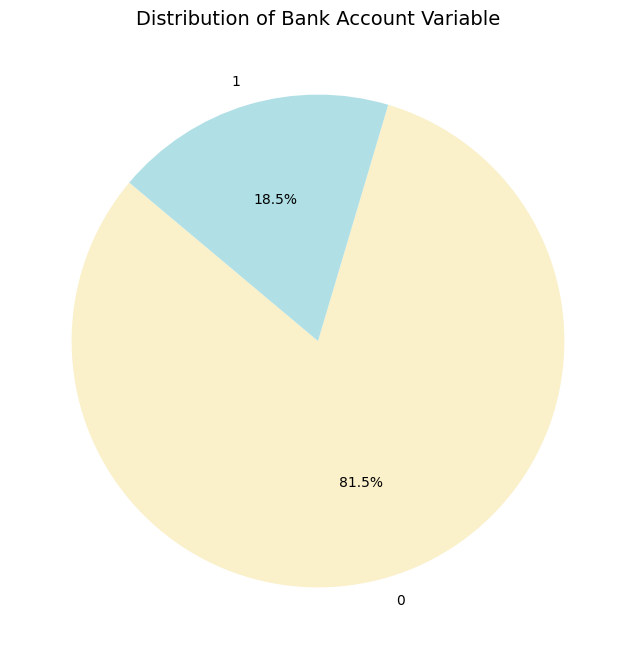

In [133]:
y_pred = stacking_classifier.predict(X_test_prediction)

import matplotlib.pyplot as plt
import numpy as np

# Custom color palette for the pie chart
colors = [ '#FAF0CA', 
          '#B0E0E6', '#FFDAB9', '#E6E6FA', '#FFF0F5', '#D3D3D3']

# Calculate the unique values and their frequency counts in y_test
values, counts = np.unique(y_pred, return_counts=True)
# Normalize the counts to get proportions
proportions = counts / counts.sum()

# Generate a pie plot with the custom colors
plt.figure(figsize=(10, 8))  # Adjust the figure size to your preference
plt.pie(proportions, labels=values, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Bank Account Variable', fontsize=14)  # You can adjust the title and fontsize
plt.show()

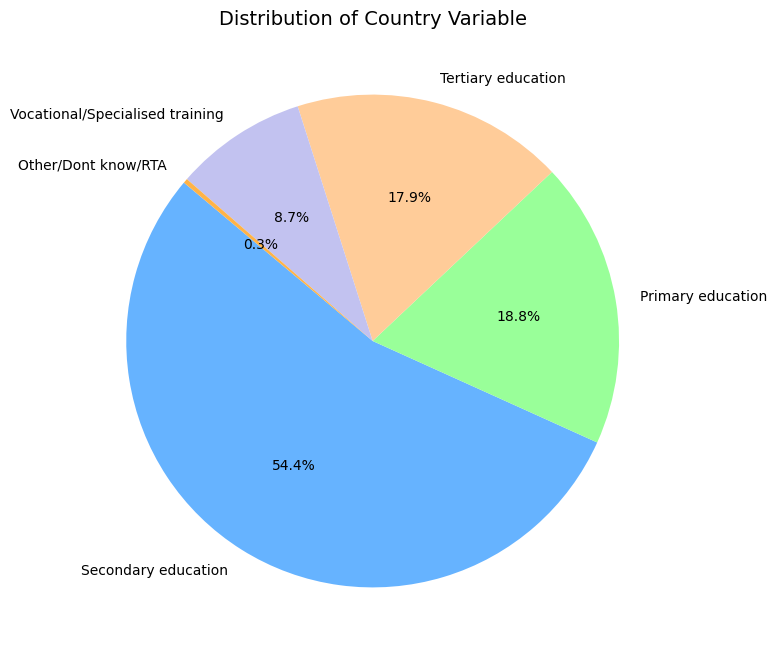

In [134]:
import matplotlib.pyplot as plt

# Custom color palette for the pie chart
colors = ['#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0','#FFB347', '#C4E17F', '#76D7EA', '#FFD1DC', '#D0BBFF', '#FEB2A8', '#FAF0CA', '#B0E0E6', '#FFDAB9', '#E6E6FA', '#FFF0F5', '#D3D3D3']

# Calculate the distribution of the 'bank_account' variable as before
distribution = X_test_prediction['education_level'].value_counts(normalize=True)

# Generate a pie plot with the custom colors
plt.figure(figsize=(10, 8))  # Adjust the figure size to your preference
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Country Variable', fontsize=14)  # You can adjust the title and fontsize
plt.show()


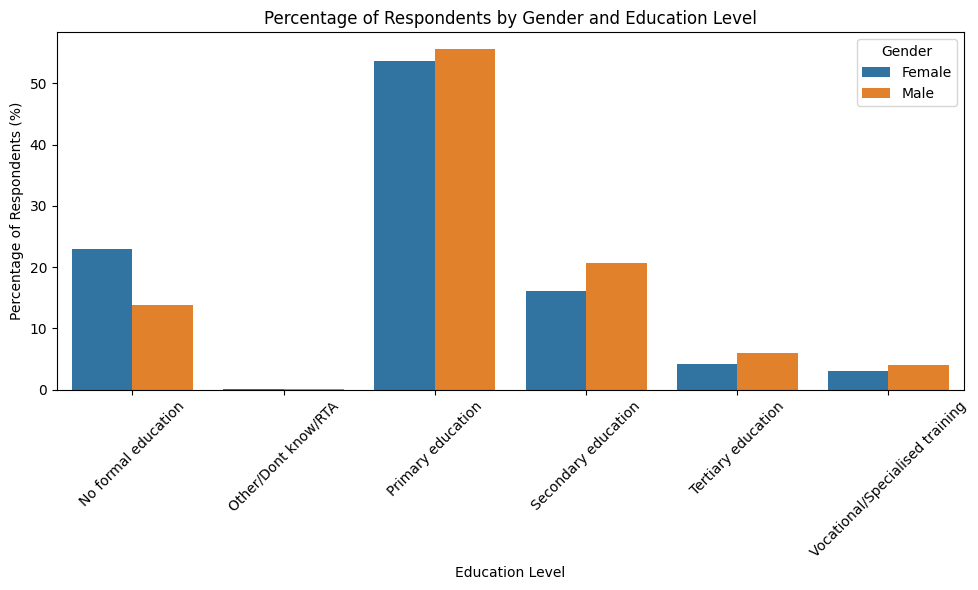

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Group by 'gender_of_respondent' and 'education_level', then count occurrences
grouped_df = train.groupby(['gender_of_respondent', 'education_level']).size().reset_index(name='count')

# Calculate totals for each gender
gender_totals = train['gender_of_respondent'].value_counts().reset_index()
gender_totals.columns = ['gender_of_respondent', 'total']

# Merge the totals back to the grouped dataframe
grouped_df = pd.merge(grouped_df, gender_totals, on='gender_of_respondent')

# Calculate percentage
grouped_df['percentage'] = (grouped_df['count'] / grouped_df['total']) * 100

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='education_level', y='percentage', hue='gender_of_respondent', data=grouped_df)

plt.title('Percentage of Respondents by Gender and Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Respondents (%)')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.legend(title='Gender')
plt.tight_layout()

plt.show()


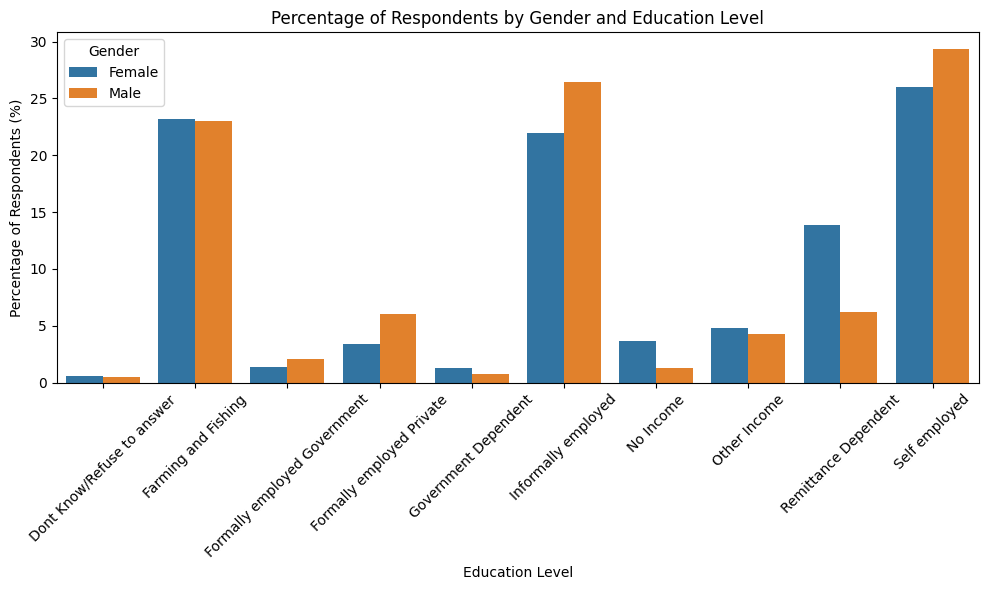

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Group by 'gender_of_respondent' and 'education_level', then count occurrences
grouped_df = train.groupby(['gender_of_respondent', 'job_type']).size().reset_index(name='count')

# Calculate totals for each gender
gender_totals = train['gender_of_respondent'].value_counts().reset_index()
gender_totals.columns = ['gender_of_respondent', 'total']

# Merge the totals back to the grouped dataframe
grouped_df = pd.merge(grouped_df, gender_totals, on='gender_of_respondent')

# Calculate percentage
grouped_df['percentage'] = (grouped_df['count'] / grouped_df['total']) * 100

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='job_type', y='percentage', hue='gender_of_respondent', data=grouped_df)

plt.title('Percentage of Respondents by Gender and Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Respondents (%)')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.legend(title='Gender')
plt.tight_layout()

plt.show()


In [ ]:
assert(1==2)

AssertionError: 

Let’s observe the sample results from our submission DataFrame.


Save results in the CSV file.


# ******************* GOOD LUCK!!! ***************************